In [1]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image, ImageDraw
import requests

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [23]:
%%time

url = "data/SSU22-2101.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open(url)

CPU times: user 866 µs, sys: 8.24 ms, total: 9.1 ms
Wall time: 10.4 ms


In [24]:
%%time

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
# draw = ImageDraw.Draw(image)
# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9

target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    if model.config.id2label[label.item()] == "person" and round(score.item(), 3) > 0.3:
        print(
                f"Detected {model.config.id2label[label.item()]} with confidence "
                f"{round(score.item(), 3)} at location {box}"
        )
#         draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline="red", width=10)


Detected person with confidence 0.97 at location [1046.76, 2682.8, 3165.74, 5231.26]
CPU times: user 1.33 s, sys: 891 ms, total: 2.22 s
Wall time: 912 ms


In [25]:
img1 = image.crop((1046.76, 2682.8, 3165.74, 5231.26)) # x0, y0, x1, y1

In [26]:
img1.show()

In [18]:
import cv2
img_cv = cv2.imread(url)
img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

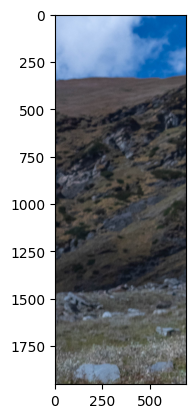

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img_cv[1796:3749, 452:1146])